<a href="https://colab.research.google.com/github/juniorsantin1992/Machine-learning-titanic/blob/main/machine_learning_titanic__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  INTRODUÇÃO

##  Titanic - Aprendizado de máquina a partir de desastres



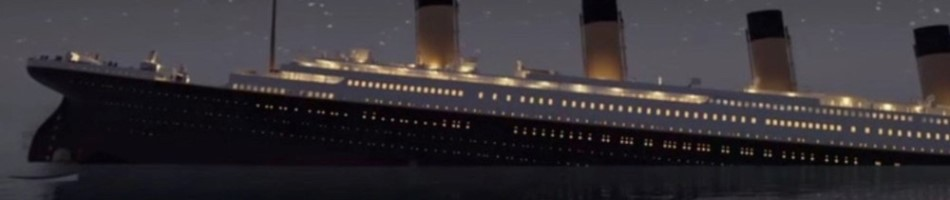
________________________________________________________________________________

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipos de pessoas tinham mais probabilidade de sobreviver?” usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

Os dados para esta motivação foram divididos em dois grupos:

* conjunto de treinamento (train.csv)
* conjunto de teste (test.csv)

O conjunto de treinamento foi disponibilizado para  construir  modelos de machine learning. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como “ground truth”) para cada passageiro. Seu modelo será baseado em “recursos” como gênero e classe dos passageiros.


O desafio do conjunto de teste deve ser usado para ver o quão bem seu modelo se sai em dados não vistos. Para o conjunto de teste, não fornecemos a verdade básica para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de teste, use o modelo que você treinou para prever se eles **sobreviveram ou não ao naufrágio do Titanic.**


Notas Variáveis:
* **pclass** : Um proxy para status socioeconômico (SES)
* **1º** = Alto
* **2º** = Médio
* **3º** = Baixo
* **idade** : A idade é fracionária se for menor que 1. Se a idade for estimada, ela está no formato de xx,5
* **sibsp** : O conjunto de dados define as relações familiares desta forma...
Irmão = irmão, irmã, meio-irmão, meia-irmã
Cônjuge = marido, esposa (amantes e noivos foram ignorados)
* **parch** : O conjunto de dados define as relações familiares desta forma...
Pai = mãe, pai
Filho = filha, filho, enteada, enteado
Algumas crianças viajaram apenas com uma babá, portanto parch=0 para elas.

____________________________________________________________________________


* A primeira etapa será realizar uma análise preliminar dos dataframes para entender a estrutura e o conteúdo dos dados. Em seguida, tratarei os dados para lidar com valores nulos, transformar colunas categóricas em numéricas e remover informações irrelevantes. Este tratamento é essencial para preparar os dados para a construção do modelo.

* Após o tratamento dos dados, criarei um modelo de aprendizado de máquina utilizando as características dos passageiros, como Pclass, Sex, Age, entre outras, para prever a probabilidade de sobrevivência de um passageiro no naufrágio do Titanic e realizarei testes para validar a eficácia do modelo.

* Essa abordagem visa identificar padrões e prever, com base em características específicas, se um passageiro tinha maiores chances de sobreviver ao desastre.

* Tambem criarei modelo de aprendizado de maquina de regressão e de agrupamento utilizando parametros de parentesco, o objetivo é prever em qual classe estaria um passageiro que perdeu mais familiares no desastre.



#  1 IMPORTAÇÃO DAS BIBLIOTECAS

"Para começar  neste conjunto de dados, começo importando as bibliotecas necessárias para o estudo."

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
import graphviz
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from xgboost import XGBClassifier
import seaborn as sns
import re

# 2 COLETA DE DADOS E ANALISE DOS DADOS

Coletando os dados necessários para análise, importei os arquivos gender_submission.csv, test.csv, e train.csv, disponíveis no link do desafio: https://www.kaggle.com/competitions/titanic/data.




In [ ]:
# visualização geral do dataframe ''train.csv''
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Esse código realiza uma análise simples para calcular a taxa de sobrevivência das mulheres no conjunto de dados train_data.
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% DE MULHERES QUE SOBREVIVERAM:", rate_women)

% DE MULHERES QUE SOBREVIVERAM: 0.7420382165605095


In [ ]:
# em contra partida Esse código realiza uma análise simples para calcular a taxa de sobrevivência dos homens no conjunto de dados train_data.
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

# Carregar o arquivo CSV
print("% DE HOMENS QUE SOBREVIVERAM:", rate_men)

% DE HOMENS QUE SOBREVIVERAM: 0.18890814558058924


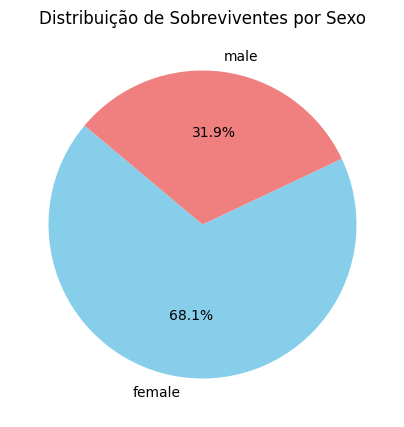

In [ ]:
# Carregar o arquivo CSV
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Filtrar os sobreviventes
survivors = df[df['Survived'] == 1]

# Contar o número de homens e mulheres que sobreviveram
sex_counts = survivors['Sex'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribuição de Sobreviventes por Sexo')
plt.show()

 **O gráfico sugere que durante o desastre, as práticas de evacuação podem ter priorizado mulheres, o que é consistente com a prática histórica de "mulheres e crianças primeiro" em cenários de emergência, como o naufrágio do Titanic.**

In [ ]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# eliminado as colunas que não irei utilizar
train_data=train_data.drop(['Cabin','PassengerId','Fare','Name'],axis=1)

In [ ]:
#o código train_data['Embarked'].value_counts()
#retorna uma série com a contagem de cada porto de embarque
#e a quantidade de vezes que cada um aparece no conjunto de dados train_data.
train_data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


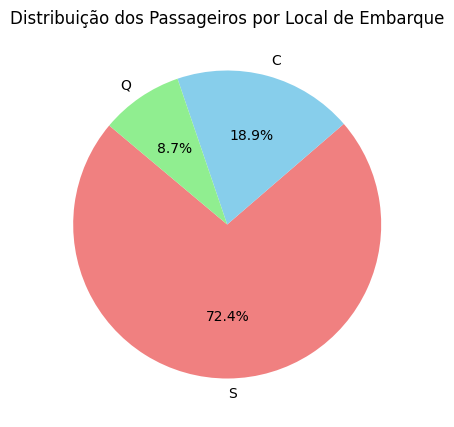

In [ ]:
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Contar o número de passageiros por local de embarque
embarked_counts = df['Embarked'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue', 'lightgreen'])
plt.title('Distribuição dos Passageiros por Local de Embarque')
plt.show()


**O gráfico de pizza mostra a distribuição dos passageiros de acordo com o porto de embarque.
Existem três principais locais de embarque representados: S (Southampton), C (Cherbourg), e Q (Queenstown).
A maioria dos passageiros embarcou em Southampton (S), que ocupa a maior fatia do gráfico.
Isso sugere que Southampton era o ponto de partida principal ou o porto de embarque mais popular entre os passageiros.**

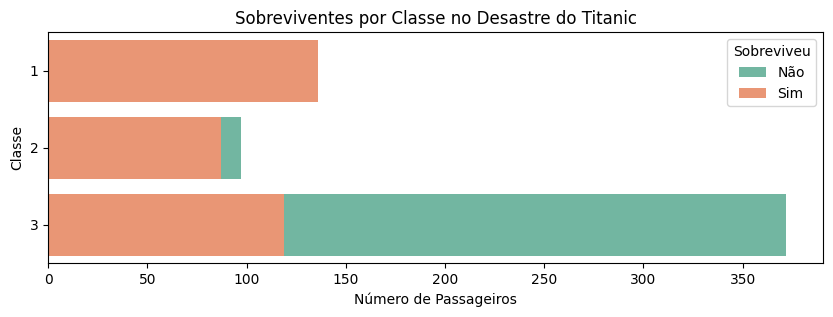

In [ ]:
# Carregar os dados do Titanic (substitua pelo seu DataFrame se necessário)
df = pd.read_csv('train.csv')

# Criar um gráfico de barras empilhadas laterais para comparar Pclass com Survived
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Pclass', hue='Survived', palette='Set2', dodge=False, orient='h')

# Adicionar títulos e rótulos
plt.title('Sobreviventes por Classe no Desastre do Titanic')
plt.ylabel('Classe')
plt.xlabel('Número de Passageiros')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])

# Exibir o gráfico
plt.show()

**No gráfico gerado, você verá as diferentes classes de passageiros (1ª, 2ª e 3ª classe) . Cada classe terá duas barras associadas: uma para os passageiros que sobreviveram e outra para os que não sobreviveram.
  Podemos notar que a 3ª classe teve a maior proporção de fatalidades, o que pode ser atribuído a uma série de fatores, incluindo localização das cabines no navio, acessibilidade aos botes salva-vidas e outras questões sociais e econômicas.**

# 3 TRATANDO OS DADOS

Nesta etapa, é necessário tratar os dados coletados devido à presença de valores nulos e colunas categóricas. Os valores nulos podem comprometer a qualidade do modelo de aprendizado de máquina, pois muitos algoritmos não conseguem lidar diretamente com a ausência de dados.

Especificamente para o prosseguimento deste estudo, transformarei as colunas "sex" e "embarked" em numéricas, tratarei os valores nulos na coluna "age", e removerei os dados categóricos da coluna "ticket", mantendo apenas os números.

In [ ]:
# transformando a coluna 'sex' em uma coluna numerica

le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
#train_data=pd.get_dummies(train_data,columns=['Sex'],drop_first=True

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,3,1,22.0,1,0,A/5 21171,S
1,1,1,0,38.0,1,0,PC 17599,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,S
3,1,1,0,35.0,1,0,113803,S
4,0,3,1,35.0,0,0,373450,S


In [ ]:
# Transformando a coluna 'embarked' em valores numericos

ohe=OneHotEncoder(sparse_output=False)
encoded_columns=ohe.fit_transform(train_data[['Embarked']])
encoded_col_names=ohe.get_feature_names_out(['Embarked'])

In [ ]:
encoded_df=pd.DataFrame(encoded_columns,columns=encoded_col_names)

In [ ]:
train_data=pd.concat([train_data,encoded_df],axis=1)

In [ ]:
train_data.drop('Embarked',axis=1,inplace=True)

In [ ]:
train_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,1,22.0,1,0,A/5 21171,0.0,0.0,1.0,0.0
1,1,1,0,38.0,1,0,PC 17599,1.0,0.0,0.0,0.0
2,1,3,0,26.0,0,0,STON/O2. 3101282,0.0,0.0,1.0,0.0


In [ ]:
#tratando a coluna ' ticket' removendo as letras e palavras, e deixando apenas valores numericos

train_data=train_data.drop('Embarked_nan',axis=1)

In [ ]:
def extract_numbers(text):
    return ''.join(re.findall(r'\d', text))

input_texts = train_data['Ticket']
results = [extract_numbers(text) for text in input_texts]
train_data['Ticket']=results

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,521171,0.0,0.0,1.0
1,1,1,0,38.0,1,0,17599,1.0,0.0,0.0
2,1,3,0,26.0,0,0,23101282,0.0,0.0,1.0
3,1,1,0,35.0,1,0,113803,0.0,0.0,1.0
4,0,3,1,35.0,0,0,373450,0.0,0.0,1.0


In [ ]:
train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [ ]:
train_data['Ticket']=pd.to_numeric(train_data['Ticket'])

In [ ]:
# a coluna 'age' possui valores nulos, então teremos que tratalos.

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Ticket      887 non-null    float64
 7   Embarked_C  891 non-null    float64
 8   Embarked_Q  891 non-null    float64
 9   Embarked_S  891 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 69.7 KB


In [ ]:
# Esse código está lidando com valores ausentes (nulos) na coluna 'Age'.

train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())

In [ ]:
train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,4
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    887 non-null    int64  
 1   Pclass      887 non-null    int64  
 2   Sex         887 non-null    int64  
 3   Age         887 non-null    float64
 4   SibSp       887 non-null    int64  
 5   Parch       887 non-null    int64  
 6   Ticket      887 non-null    float64
 7   Embarked_C  887 non-null    float64
 8   Embarked_Q  887 non-null    float64
 9   Embarked_S  887 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 76.2 KB


In [ ]:
test_data=pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# removendo as colunas 'fare','cabin' e 'name'
test_data=test_data.drop(['Fare','Cabin','Name'],axis=1)

In [ ]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,3,male,34.5,0,0,330911,Q
1,893,3,female,47.0,1,0,363272,S
2,894,2,male,62.0,0,0,240276,Q
3,895,3,male,27.0,0,0,315154,S
4,896,3,female,22.0,1,1,3101298,S


In [ ]:
# transformando a coluna 'sex' em valores numericos

le=LabelEncoder()
test_data['Sex']=le.fit_transform(test_data['Sex'])


In [ ]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,3,1,34.5,0,0,330911,Q
1,893,3,0,47.0,1,0,363272,S
2,894,2,1,62.0,0,0,240276,Q
3,895,3,1,27.0,0,0,315154,S
4,896,3,0,22.0,1,1,3101298,S


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Embarked     418 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 26.2+ KB


In [ ]:
#Este código extrai todos os números de cada entrada na coluna Ticket do DataFrame test_data.
#substitui a coluna original com esses números extraídos.
# Se a coluna Ticket originalmente continha strings alfanuméricas (por exemplo, "A/5 21171"), após o processamento, ela conterá apenas os números (por exemplo, "21171").

def extract_numbers(text):
    return ''.join(re.findall(r'\d', text))

input_texts = test_data['Ticket']
results = [extract_numbers(text) for text in input_texts]
test_data['Ticket']=results

In [ ]:
test_data['Ticket']=pd.to_numeric(test_data['Ticket'])

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    int64  
 7   Embarked     418 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 26.2+ KB


In [ ]:
#Esse código está transformando a coluna categórica Embarked em múltiplas colunas binárias usando a técnica de codificação one-hot.

ohe=OneHotEncoder(sparse_output=False)
encoded_columns=ohe.fit_transform(test_data[['Embarked']])
encoded_col_names=ohe.get_feature_names_out(['Embarked'])

In [ ]:
t_encoded_df=pd.DataFrame(encoded_columns,columns=encoded_col_names)

In [ ]:
test_data=pd.concat([test_data,t_encoded_df],axis=1)

In [ ]:
test_data=test_data.drop('Embarked',axis=1)

In [ ]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [ ]:
#valores nulos foram encontrados na coluna"age" este codigo ira calcular uma media e preencher estes valores nulos
test_data['Age']=test_data['Age'].fillna(train_data['Age'].mean())

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    int64  
 7   Embarked_C   418 non-null    float64
 8   Embarked_Q   418 non-null    float64
 9   Embarked_S   418 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 32.8 KB


In [ ]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,330911,0.0,1.0,0.0
1,893,3,0,47.0,1,0,363272,0.0,0.0,1.0
2,894,2,1,62.0,0,0,240276,0.0,1.0,0.0
3,895,3,1,27.0,0,0,315154,0.0,0.0,1.0
4,896,3,0,22.0,1,1,3101298,0.0,0.0,1.0


# 3 APRENDIZADO DE MAQUINA

**Nesta etapa, estarei criando um modelo de aprendizado de máquina para prever a probabilidade de sobrevivência de um passageiro no naufrágio do Titanic, utilizando características como Pclass, Sex, Age, entre outras. O objetivo é desenvolver um modelo de classificação para responder à principal pergunta da análise:  “que tipos de pessoas tinham mais probabilidade de sobreviver?” .**

**Além disso, estarei aplicando técnicas de aprendizado de máquina para regressão com o objetivo de explorar e confirmar outras relações nos dados, utilizando as variáveis 'SibSp', 'Pclass' e 'Parch'. O objetivo é prever em qual classe estaria um passageiro que perdeu mais familiares no desastre.**

**Também realizarei uma análise de aprendizado de máquina por agrupamento para obter uma visão mais clara e objetiva dos dados, identificando padrões e insights adicionais.**

In [ ]:
#Esse trecho de código é utilizado para preparar os dados para treinamento e teste em um modelo de aprendizado de máquina.

y=train_data['Survived']
X=train_data.drop('Survived',axis=1)
X_test=test_data.iloc[:,1:]

In [ ]:
#Este código realiza o treinamento de um modelo de classificação usando o RandomForestClassifier da biblioteca scikit-learn e faz previsões com o modelo treinado.

rfc=RandomForestClassifier()
model=rfc.fit(X,y)
predictions=model.predict(X_test)

In [ ]:
#fornece uma métrica de desempenho que indica quão bem o modelo está se saindo em termos de previsão correta sobre os dados que foram usados para treiná-lo.
model.score(X,y)

0.9988726042841037

In [ ]:
#Este código realiza o treinamento de um modelo de classificação usando o GradientBoostingClassifier da biblioteca scikit-learn e faz previsões com o modelo treinado.
gbc=GradientBoostingClassifier()
model2=gbc.fit(X,y)
predictions2=model2.predict(X_test)

In [ ]:
model2.score(X,y)

0.8985343855693348

In [ ]:
#Este código treina um modelo de XGBoost com os dados de treinamento e faz previsões de regressão com o modelo treinado usando os dados de teste.

xgb=XGBClassifier()
model3=gbc.fit(X,y)
predictions3=model3.predict(X_test)

In [ ]:
model3.score(X,y)

0.8985343855693348

## 3.1 Aprendizado de maquina: Classificação

In [ ]:
# PARA RESPONDER A PRINCIPAL PERGUNTA DA MOTIVAÇÃO “que tipos de pessoas tinham mais probabilidade de sobreviver?”
# ATRAVES DESTE APRENDIZADO DE MAQUINA IREI COMPARAR UM HOMEN E UMA MULHER DE IGUAIS IDADES E CLASSES, PARA PREVER QUAL DOS DOIS TERIA MAIS PROBABILIDADE DE SOBREVIVER

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Carregar os dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Selecionar as colunas de interesse para o treinamento
X_train = train_data[['Pclass', 'Sex', 'Age']]
y_train = train_data['Survived']

# Selecionar as colunas de interesse para o teste
X_test = test_data[['Pclass', 'Sex', 'Age']]

# Codificar a variável 'Sex' (por exemplo, 'male' -> 0 e 'female' -> 1)
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Preencher valores faltantes na coluna 'Age' com a mediana
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)

# Criar e treinar o classificador
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Criar dataframes para os passageiros específicos
passenger_male = pd.DataFrame({
    'Pclass': [1],
    'Sex': [0],  # 0 para masculino
    'Age': [55]
})

passenger_female = pd.DataFrame({
    'Pclass': [1],
    'Sex': [1],  # 1 para feminino
    'Age': [55]
})

# Prever a probabilidade de sobrevivência para ambos os casos
probability_male = rfc.predict_proba(passenger_male)[0][1]
probability_female = rfc.predict_proba(passenger_female)[0][1]

print(f'A probabilidade de um passageiro masculino de 55 anos na primeira classe sobreviver ao Titanic é: {probability_male:.2f}')
print(f'A probabilidade de uma passageira feminina de 55 anos na primeira classe sobreviver ao Titanic é: {probability_female:.2f}')





<ipython-input-152-846e6ad4867a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
<ipython-input-152-846e6ad4867a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})
<ipython-input-152-846e6ad4867a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

A probabilidade de um passageiro masculino de 55 anos na primeira classe sobreviver ao Titanic é: 0.01
A probabilidade de uma passageira feminina de 55 anos na primeira classe sobreviver ao Titanic é: 1.00


 **utilizarei o modelo treinado com o RandomForestClassifier, que apresentou uma eficácia de 0,998. Com base nesse modelo,  A probabilidade de sobrevivência de 0.01 para o passageiro masculino é extremamente baixa, enquanto a probabilidade de 1.00 para a passageira feminina é extremamente alta. Isso sugere que, de acordo com o modelo treinado, mulheres tinham uma chance muito maior de sobreviver comparado aos homens, especialmente na primeira classe.**

<ipython-input-3-c805f15fa7cb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
<ipython-input-3-c805f15fa7cb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})
<ipython-input-3-c805f15fa7cb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

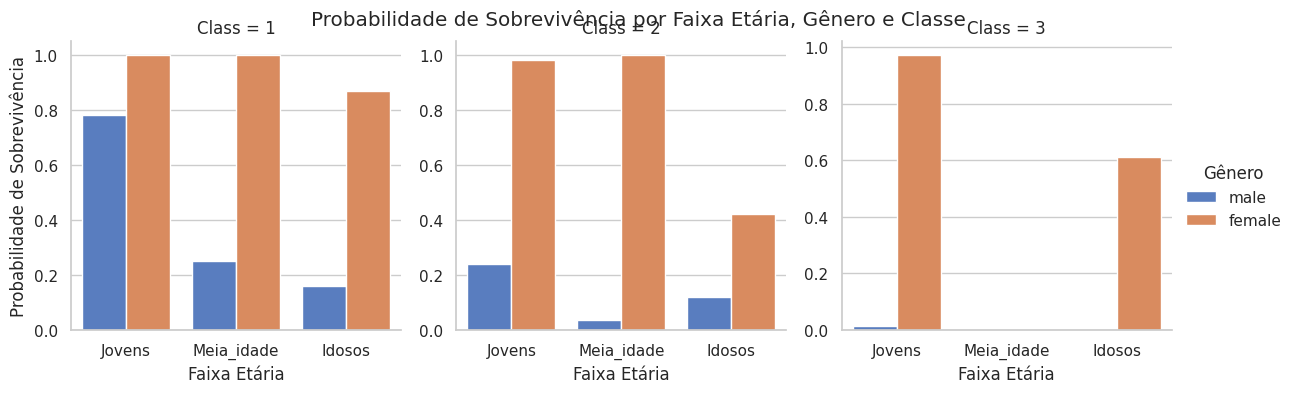

In [ ]:

# PARA TER UMA BASE MAIS SOLIDA DOS RESULTADOS DO APRENDIZADO DE MAQUINA SEPAREI EM GRUPOS DE ''JOVENS, MEIA IDADE E IDOSOS,''.
# COMPARANDO POR FAIXA ETARIA, GENERO, E CLASSE.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Carregar os dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Selecionar as colunas de interesse para o treinamento
X_train = train_data[['Pclass', 'Sex', 'Age']]
y_train = train_data['Survived']

# Codificar a variável 'Sex' (por exemplo, 'male' -> 0 e 'female' -> 1)
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test = test_data[['Pclass', 'Sex', 'Age']]
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Preencher valores faltantes na coluna 'Age' com a mediana
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)

# Criar e treinar o classificador
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Definir faixas etárias e classes
ages = ['Jovens', 'Meia_idade', 'Idosos']
classes = [1, 2, 3]

# Definir faixas etárias (supondo: jovem: 0-30, meia-idade: 31-50, velho: 51+)
age_ranges = {
    'Jovens': (0, 30),
    'Meia_idade': (31, 50),
    'Idosos': (51, 100)  # Supondo 100 como a idade máxima para este exemplo
}

# Criar e prever para cada combinação de faixa etária, gênero e classe
results = []

for age_group, (age_min, age_max) in age_ranges.items():
    for pclass in classes:
        for gender in [0, 1]:  # 0 para masculino, 1 para feminino
            passenger = pd.DataFrame({
                'Pclass': [pclass],
                'Sex': [gender],
                'Age': [age_min + (age_max - age_min) / 2]  # Usar a idade média do intervalo
            })

            # Prever a probabilidade de sobrevivência
            probability = rfc.predict_proba(passenger)[0][1]
            gender_label = 'male' if gender == 0 else 'female'
            results.append({
                'Class': pclass,
                'Gender': gender_label,
                'Age Group': age_group,
                'Survival Probability': probability
            })

# Criar um DataFrame para exibir os resultados
results_df = pd.DataFrame(results)

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico com facetas para cada classe
g = sns.FacetGrid(results_df, col="Class", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="Age Group", y="Survival Probability", hue="Gender", palette="muted", ci=None)

# Adicionar títulos e rótulos
g.set_axis_labels("Faixa Etária", "Probabilidade de Sobrevivência")
g.add_legend(title='Gênero')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Probabilidade de Sobrevivência por Faixa Etária, Gênero e Classe')

plt.show()

* Gênero:Mulheres: A probabilidade de sobrevivência é significativamente maior para mulheres em todas as faixas etárias e classes. Isso reflete a política de prioridade de evacuação do Titanic, onde mulheres e crianças eram priorizadas durante o resgate.
Homens: A probabilidade de sobrevivência é muito menor para homens, especialmente para aqueles na faixa etária mais velha. Isso pode indicar que homens enfrentaram mais dificuldades para escapar do desastre.

* Faixa Etária:Jovens: Para mulheres jovens, a probabilidade de sobrevivência é alta em todas as classes. Para homens jovens, a probabilidade é menor, mas ainda mais alta comparada aos grupos de meia-idade e velhos.
Meia-idade: Mulheres de meia-idade ainda têm uma alta probabilidade de sobrevivência, mas a probabilidade para homens de meia-idade começa a cair mais, refletindo um padrão de sobrevivência menos favorável para eles.
Velhos: Para mulheres idosas, a probabilidade de sobrevivência é relativamente alta, indicando que mesmo em idades mais avançadas, a prioridade para mulheres ajudou a melhorar suas chances. Para homens idosos, a probabilidade de sobrevivência é muito baixa em todas as classes, sugerindo que a idade avançada combinada com o gênero masculino resultou em uma chance mínima de sobrevivência.
Classe Social:

* Classe 1: As probabilidades de sobrevivência são mais altas em todas as faixas etárias e gêneros na primeira classe, refletindo a ideia de que passageiros da primeira classe tinham melhores recursos e acesso a botes salva-vidas.

* Classe 2 e Classe 3: A probabilidade de sobrevivência diminui à medida que a classe social desce, o que é consistente com a percepção histórica de que passageiros das classes mais baixas tinham menos acesso a botes salva-vidas e estavam em desvantagem durante o resgate.

## 3.2 Aprendizado de maquina: Regressão

In [ ]:
# RESPONDENDO UMA PERGUNTA: Quero prever em qual classe estaria um passageiro que perdeu mais do que 2 'parch'(número de pais/filhos a bordo do Titanic)? usando o RandomForestRegressor.

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Definindo o alvo e as características
y = train_data["Pclass"]

features = ["SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Alinhar as colunas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Treinar o modelo de regressão
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y)

# Fazer previsões
predictions = model.predict(X_test)

In [ ]:

# Filtrar os passageiros que têm mais de 1 Parch
filtered_train_data = train_data[train_data["Parch"] > 2]

# Definir o alvo e as características
y = filtered_train_data["Pclass"]
features = ["SibSp", "Parch"]  # Características usadas para prever Pclass
X = pd.get_dummies(filtered_train_data[features])

# Dividir o conjunto de dados para treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Treinar o modelo de regressão
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred = model.predict(X_val)

# Avaliar o modelo
print("Mean Squared Error:", mean_squared_error(y_val, y_pred))

# Filtrar o conjunto de teste da mesma forma
filtered_test_data = test_data[test_data["Parch"] > 2]
X_test = pd.get_dummies(filtered_test_data[features])

# Alinhar as colunas
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Adicionar as previsões ao DataFrame de teste
filtered_test_data['Predicted_Pclass'] = predictions

# Exibir ou salvar as previsões conforme necessário
print(filtered_test_data[['Parch', 'Predicted_Pclass']])


Mean Squared Error: 1.1642840415721845
     Parch  Predicted_Pclass
24       3          2.645667
69       4          2.863857
132      4          2.981190
139      6          2.994000
142      3          2.645667
174      5          2.994000
178      3          2.873833
342      9          2.994000
365      9          2.994000


<ipython-input-136-274692b8688f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_data['Predicted_Pclass'] = predictions


**O MSE de aproximadamente 1.164 indica o quão bem o modelo está ajustando os dados de validação. Um MSE mais baixo indica melhor desempenho do modelo, embora o que é considerado "baixo" pode variar dependendo do contexto e do range dos dados. Neste caso, como o Pclass é uma variável ordinal discreta (1, 2, 3), o MSE pode não ser muito intuitivo, mas ainda assim fornece uma métrica do erro médio quadrático.**

Predições no Conjunto de Teste:

**As previsões (Predicted_Pclass) para passageiros com mais de 2 pais/filhos variam entre 2.645 e 2.994, o que indica que o modelo está prevendo principalmente a classe 2, que é a classe intermediária, Porem o valor médio parece estar muito próximo de 3, o que pode indicar uma tendência do modelo de prever a classe 3 para passageiros com a perca de mais de 2 pais/filhos.**

## 3.3 Aprendizado de maquina: Agrupamento

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Renomear colunas
feature_names = ["classe", "irmãos/cônjuges", "pais/filhos", "idade"]
features = ["Pclass", "SibSp", "Parch", "Age"]

# Selecionar características e alvo
X = train_data[features].copy()
y = train_data["Survived"]

# Tratar valores ausentes em 'Age'
X['Age'].fillna(X['Age'].median(), inplace=True)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criar DataFrame normalizado para visualização
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)


In [ ]:
# Definir o número de clusters
n_clusters = 3  # Você pode ajustar esse número conforme necessário

# Inicializar e treinar o modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=1)
kmeans.fit(X_scaled)

# Adicionar os rótulos de cluster aos dados
train_data['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


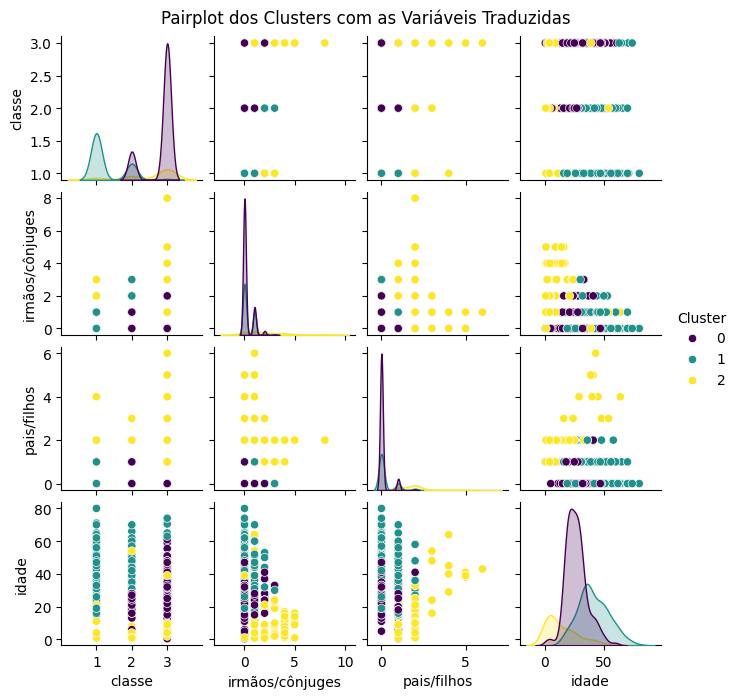

In [ ]:
# Preparar DataFrame para visualização
plot_data = train_data[features + ['Cluster']]
plot_data.columns = feature_names + ['Cluster']

# Criar o pairplot com tamanho reduzido
sns.pairplot(plot_data, hue='Cluster', palette='viridis', height=1.70)
plt.suptitle('Pairplot dos Clusters com as Variáveis Traduzidas', y=1.02)  # Ajustar título
plt.show()


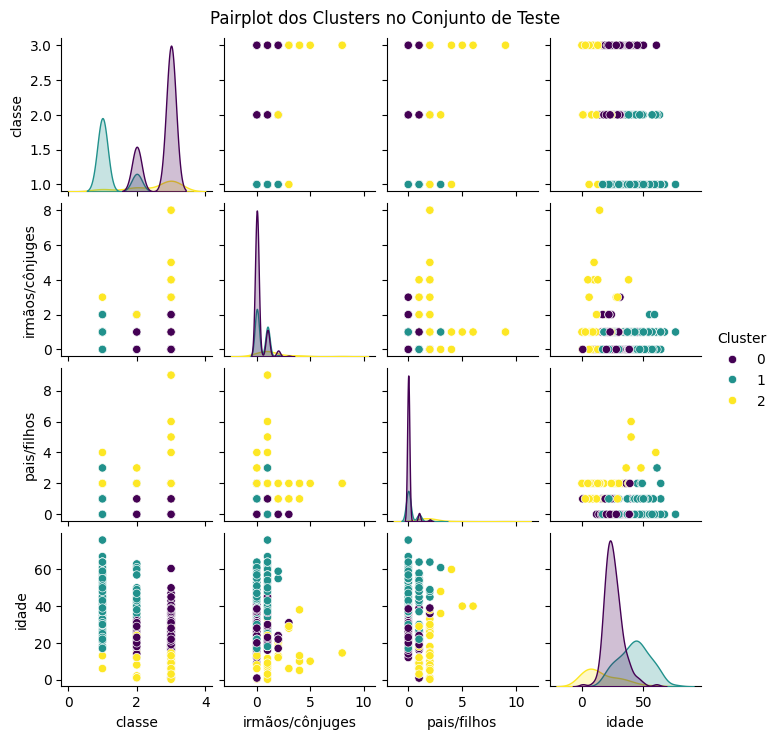

In [ ]:
# Preparar dados de teste
X_test = test_data[features].copy()
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test_scaled = scaler.transform(X_test)

# Prever os clusters no conjunto de teste
test_data['Cluster'] = kmeans.predict(X_test_scaled)

# Preparar DataFrame para visualização
plot_test_data = test_data[features + ['Cluster']]
plot_test_data.columns = feature_names + ['Cluster']

# Visualizar os dados de teste com tamanho reduzido
sns.pairplot(plot_test_data, hue='Cluster', palette='viridis', height=1.80)
plt.suptitle('Pairplot dos Clusters no Conjunto de Teste', y=1.02)  # Ajustar título
plt.show()


* **Cluster 0 (roxo):**
Este cluster agrupa indivíduos mais jovens, com idades predominantes abaixo de 30 anos. Esses indivíduos, em sua maioria, estavam em classes inferiores (2ª ou 3ª classe) e tinham poucos ou nenhum irmão/cônjuge e pais/filhos a bordo. A concentração de pontos com SibSp = 0 e Parch = 0 sugere que muitos desses passageiros estavam viajando sozinhos ou com poucos familiares.

* **Cluster 1 (verde-azulado):**
Este cluster mostra uma faixa etária mais variada, mas ainda assim, muitos dos passageiros têm idades abaixo de 50 anos. Eles parecem estar mais distribuídos entre as classes e têm uma presença significativa de indivíduos com pelo menos um irmão/cônjuge ou pais/filhos a bordo. Isso sugere que este cluster poderia representar grupos familiares pequenos ou pessoas viajando com um parceiro.


* **Cluster 2 (amarelo):**
O terceiro cluster agrupa principalmente indivíduos mais velhos, muitos dos quais estavam em classes superiores (1ª classe). Há uma distribuição maior em SibSp e Parch, indicando que este grupo inclui passageiros com famílias maiores ou grupos de viagem mais numerosos. A presença de idades mais avançadas e a concentração em classes superiores pode indicar passageiros de maior poder aquisitivo.

**Considerações Finais:**

A análise do pairplot em conjunto com o código sugere que o modelo K-Means conseguiu identificar três grupos principais entre os passageiros, com diferenças marcantes em idade, estrutura familiar e classe de viagem. Estes clusters podem refletir diferentes perfis de passageiros, como jovens solteiros de classes mais baixas, famílias pequenas em classes intermediárias, e passageiros mais velhos e possivelmente mais ricos nas classes superiores.